# 1.Import Required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler



# 2. Loading the data

In [3]:
df=pd.read_csv("C:/Users/munigangadhar/Desktop/Project documents/Clinical outcome validation Dataset.csv")

# 3. Initial Inspection:

In [4]:
df.dtypes

EmbryoID                   object
PatientAge                float64
Day                         int64
EmbryologistID             object
MorphologyGrade            object
Fragmentation             float64
BlastocystExpansion       float64
AIGrade                    object
SelectedforTransfer_01      int64
ClinicalPregnancy_01        int64
AssessmentDate             object
dtype: object

In [5]:
df.head

<bound method NDFrame.head of           EmbryoID  PatientAge  Day EmbryologistID MorphologyGrade  \
0      E2024022837        40.0    5          EMB02             1AA   
1      E2023052631        28.0    5          EMB01             2BA   
2      E2023091009        36.0    3          EMB02            Good   
3      E2023121805        32.0    3          emb03            Good   
4      E2024050445        37.0    5          EMB04             2BA   
...            ...         ...  ...            ...             ...   
27970  E2023101247        31.0    5          EMB02             4AA   
27971  E2024081625        33.0    5          EMB01             3AB   
27972  E2024121646        30.0    3          EMB04            Poor   
27973  E2024022623        32.0    5          EMB02             3AA   
27974  E2023011819        33.0    3          EMB01            Poor   

       Fragmentation  BlastocystExpansion AIGrade  SelectedforTransfer_01  \
0               30.0                  4.4       B   

In [6]:
df.shape

(27975, 11)

In [7]:
df.columns

Index(['EmbryoID', 'PatientAge', 'Day', 'EmbryologistID', 'MorphologyGrade',
       'Fragmentation', 'BlastocystExpansion', 'AIGrade',
       'SelectedforTransfer_01', 'ClinicalPregnancy_01', 'AssessmentDate'],
      dtype='object')

In [8]:
df.shape[0]

27975

In [9]:
df.shape[1]

11

# 4. Checking dulpicate rows and columns

#for rows

In [10]:
patient_data_dup_rows=df.duplicated()
patient_data_count=sum(patient_data_dup_rows)
print(patient_data_count)

127


#for columns

In [11]:
patient_data_dup_cols=df.T.duplicated()
patient_data_count=sum(patient_data_dup_cols)
print(patient_data_count)

0


In [12]:
patient_data_dup_rows=df.drop_duplicates()
patient_data_dup_rows.shape

(27848, 11)

# Zero variance check

In [13]:
num_cols=df.select_dtypes(include=np.number)
variance=num_cols.var()
print(variance)
num_cols.var()==0

PatientAge                17.315536
Day                        0.960462
Fragmentation             80.923236
BlastocystExpansion        2.057144
SelectedforTransfer_01     0.211432
ClinicalPregnancy_01       0.221474
dtype: float64


PatientAge                False
Day                       False
Fragmentation             False
BlastocystExpansion       False
SelectedforTransfer_01    False
ClinicalPregnancy_01      False
dtype: bool

# Handle missing Values

In [14]:
df.isna().sum()

EmbryoID                      0
PatientAge                  835
Day                           0
EmbryologistID                0
MorphologyGrade               0
Fragmentation               558
BlastocystExpansion       11858
AIGrade                       0
SelectedforTransfer_01        0
ClinicalPregnancy_01          0
AssessmentDate                0
dtype: int64

In [15]:
num_cols = ["PatientAge", "Fragmentation", "BlastocystExpansion"]

imputer = SimpleImputer(strategy="median")
df[num_cols] = imputer.fit_transform(df[num_cols])

In [16]:
print(df[num_cols])

       PatientAge  Fragmentation  BlastocystExpansion
0            40.0           30.0                  4.4
1            28.0            5.0                  6.0
2            36.0            8.0                  3.5
3            32.0           15.0                  3.5
4            37.0           25.0                  1.6
...           ...            ...                  ...
27970        31.0            0.0                  3.7
27971        33.0           30.0                  2.0
27972        30.0           15.0                  3.5
27973        32.0           20.0                  1.3
27974        33.0           20.0                  3.5

[27975 rows x 3 columns]


In [17]:
df[["PatientAge", "Fragmentation", "BlastocystExpansion"]].head()

,PatientAge,Fragmentation,BlastocystExpansion
0,40.0,30.0,4.4
1,28.0,5.0,6.0
2,36.0,8.0,3.5
3,32.0,15.0,3.5
4,37.0,25.0,1.6


# Making changes in morphology grade by giving condition on based on fragmentation %

In [18]:
import random

def morphology_grade_from_fragmentation_range(frag):
    if frag < 10:
        grades = ["1AA"]
    elif 10 <= frag <= 25:
        grades = ["2AB", "2BA", "2BB"]
    elif 26 <= frag <= 50:
        grades = ["3AA", "3AB", "3BA", "3BB"]
    else:
        grades = ["4AA", "4AB", "4BA", "4BB"]
    
    return random.choice(grades)

df["Morphology_Grade"] = df["Fragmentation"].apply(
    morphology_grade_from_fragmentation_range
)

In [19]:
print(df['Morphology_Grade'])

0        3BB
1        1AA
2        1AA
3        2BB
4        2AB
        ... 
27970    1AA
27971    3BB
27972    2BA
27973    2BB
27974    2BB
Name: Morphology_Grade, Length: 27975, dtype: object


In [20]:
df = df.drop(columns=["MorphologyGrade"])

#  Map morphology grade to quality level

In [21]:
def quality_level_from_morphology(morph):
    if morph == "1AA":
        return "Excellent"
    elif morph in ["2AB", "2BA", "2BB"]:
        return "Good"
    elif morph in ["3AA", "3AB", "3BA", "3BB"]:
        return "Fair"
    elif morph in ["4AA", "4AB", "4BA", "4BB"]:
        return "Poor"
    else:
        return None
df["Quality_Level"] = df["Morphology_Grade"].apply(
    quality_level_from_morphology
)

In [22]:
df[["Fragmentation", "Morphology_Grade", "Quality_Level"]].head()


,Fragmentation,Morphology_Grade,Quality_Level
0,30.0,3BB,Fair
1,5.0,1AA,Excellent
2,8.0,1AA,Excellent
3,15.0,2BB,Good
4,25.0,2AB,Good


# Outlier Analysis

In [23]:
num_features = [
    "PatientAge",
    "Fragmentation",
    "BlastocystExpansion",
    "Day"
]
print("Outlier count BEFORE treatment:\n")

for col in num_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {outliers.shape[0]} outliers")


Outlier count BEFORE treatment:

PatientAge: 472 outliers
Fragmentation: 0 outliers
BlastocystExpansion: 8619 outliers
Day: 0 outliers


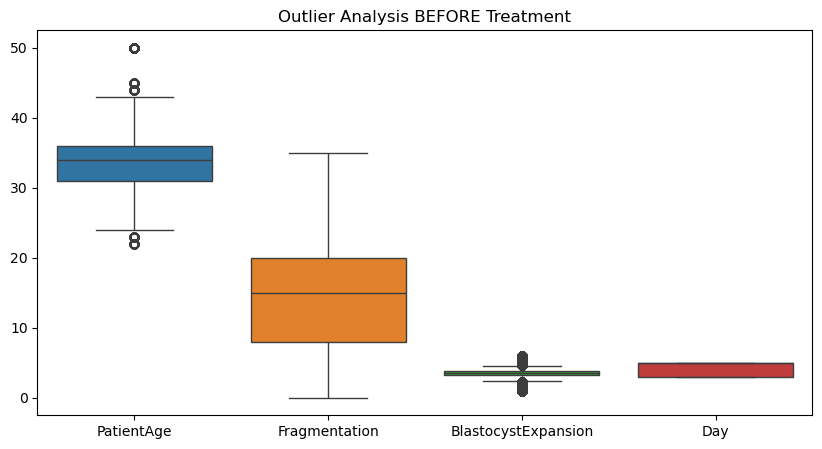

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[num_features])
plt.title("Outlier Analysis BEFORE Treatment")
plt.show()

In [25]:
df_outlier_treated = df.copy()

num_features = [
    "PatientAge",
    "Fragmentation",
    "BlastocystExpansion",
    "Day"
]

# Apply IQR-based capping
for col in num_features:
    Q1 = df_outlier_treated[col].quantile(0.25)
    Q3 = df_outlier_treated[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_outlier_treated[col] = df_outlier_treated[col].clip(lower, upper)

print("Outlier count AFTER treatment:\n")

# Re-check outliers after treatment
for col in num_features:
    Q1 = df_outlier_treated[col].quantile(0.25)
    Q3 = df_outlier_treated[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df_outlier_treated[
        (df_outlier_treated[col] < lower) | 
        (df_outlier_treated[col] > upper)
    ]
    print(f"{col}: {outliers.shape[0]} outliers")

Outlier count AFTER treatment:

PatientAge: 0 outliers
Fragmentation: 0 outliers
BlastocystExpansion: 0 outliers
Day: 0 outliers


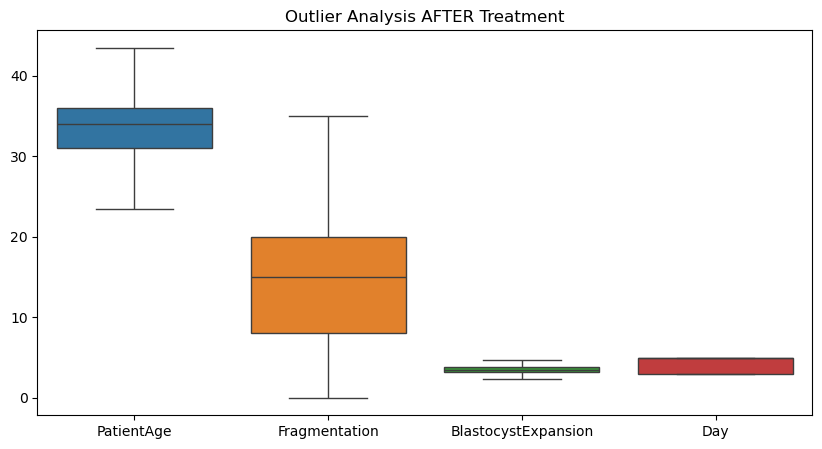

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_outlier_treated[num_features])
plt.title("Outlier Analysis AFTER Treatment")
plt.show()

In [27]:
final_columns = [
    "PatientAge",
    "Fragmentation",
    "BlastocystExpansion",
    "Morphology_Grade",
    "Quality_Level"
]
other_cols = [col for col in df.columns if col not in final_columns]

df = df[final_columns + other_cols]


In [28]:
import os
print(os.getcwd())

C:\Users\munigangadhar


In [29]:
df.to_csv(
    "C:/Users/munigangadhar/Desktop/Project documents/Clinical_outcome_validation_cleaned.csv",
    index=False
)